# Scatterplots
*by Anders Sundell*

Scatterplots are one of the most common types of graphs two show relationships between two variables. The reasons is that they convey a lot of information at once: the correlation, the spread, outliers, and actually every observations value, even if the exact value can be hard to see.

A nice scatterplot is also often more intuitively convincing than a sofisticated but convoluted regression analysis, even if the latter can take more variables into account. A good report generally uses both intutitive graphs and rigorous analysis. In this guide we will see how to make a nice scatterplot in Stata, and how to adjust it to make it more clear and better-looking.

The data we will use is the QoG basic dataset. Here I load the data directly into Stata from the internet, but it is generally preferable to download it to the computer and load it from there.

In [2]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


## A simple scatterplot

In this example we will investigate the relationship between a country's levels of democracy and corruption.

We will use the Polity measure of democracy `p_polity2`, which ranges from -10 (maximum dictatorship) to +10 (maximum democracy). The measure of corruption is Transparency Internationals' Corruption Perceptions Index, `ti_cpi`.

The scatterplot is one of many graphs that can be found under the command `twoway`. The `twoway` command indicates that we want a graph with two axes, and we then add different graphs in layers, each layer within one set of parentheses.

Within the parentheses we first write `scatter` and then the y-variable, followed by the x-variable. Usually, we place our independent variable (democracy in this case) on the x-axis.


.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


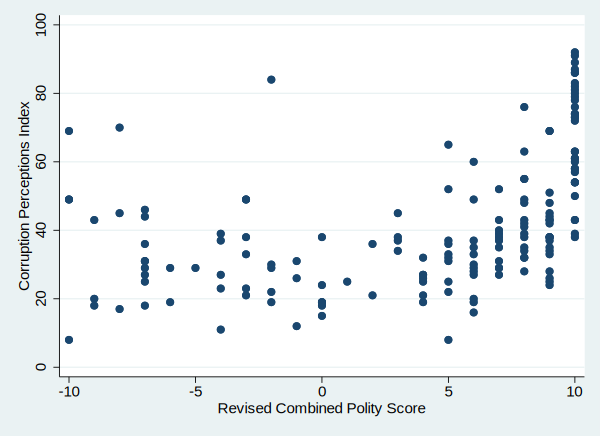


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [3]:
twoway (scatter ti_cpi p_polity2)

Each dot now represents one country, and we can see the value of the country on the two variables depending on where it is placed in the graph.

## Add a regression line

If we want to make the relationship more apparent - which might be good, pedagogically, but bad if we draw attention to weak relationships - we can add a regression line. Technically, we do it by adding a new layer, which holds the regression line. If we add the layer after the scatter layer, the line will go on top of the dots, otherwise below. The command for fitting a regression line is `lfit`, followed by the y-variable and then the x-variable.


.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


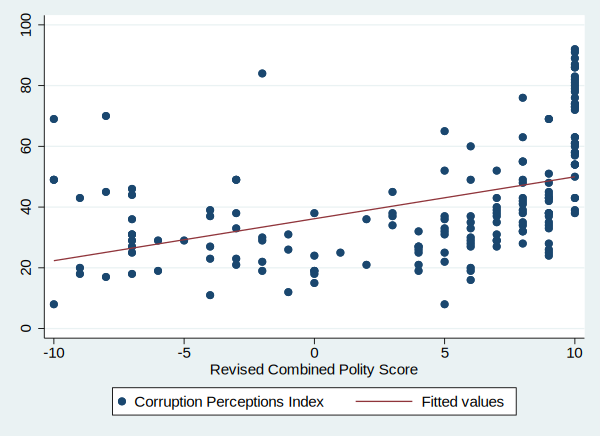


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [4]:
twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2)

A legend showing what the various elements of the graph represent is automatically added to the graph when we add more than one layer. If we want to remove it, we can after all the parentheses in the command add an option for the entire `twoway` command, `legend(off)`. This might be wise when we add many layers, and the legend starts to take up too much space. In those case, it is often better to explain the graph in a text note.

. cap noi twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2), legend(off
> )

. if _rc == 0 {
.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


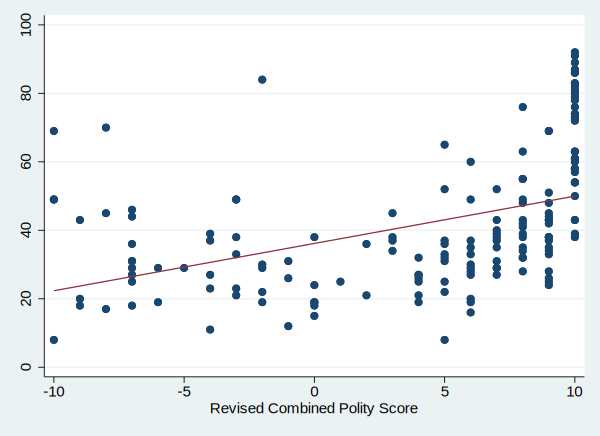


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [5]:
twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2), legend(off)

## Add marker labels

One of the more fun parts about scatterplots is to show which units of analysis that actually are represented by the dots in the graph. It does not work very well when we have thousands of observations, or when they are anonymous survey respondents. But when we have a small number of well-known units, such as countriues, this is often an effective approach.

We do that by adding an option, in the scatter parentheses. Each layer in the graph can have its own options, just as the graph as a whole has options.

The relevant option is `mlabel()`, where we state the variable that will be the labels in the parentheses. We will use the variable `cname`, that is, the name of the country.

We also add the option `mlabsize(vsmall)`, which makes the labels smaller, and easier to read.


.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


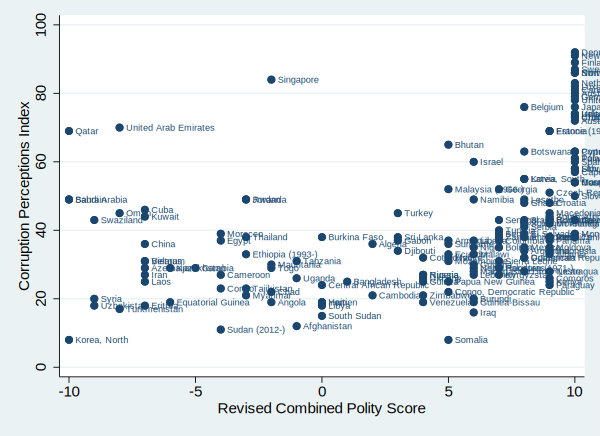


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [6]:
twoway (scatter ti_cpi p_polity2, mlabel(cname) mlabsize(vsmall))

Everyone who saw previous versions of the graph would have asked themselves which country the lone dot in the middle high above the crowd was - now we can see that it is Singapore, a state that is special in many respects.

## Highlight specific observations

The graph is however not very readable to the right, where there are too many countries for us too read. To solve that problem, we can do a special variable that acts as a selector for the countries whose names we want to highlight.

For this, we use the `generate` command, together with an if-statement. The if-statement uses the "or" sign |, which means that the whole condition is satisfied when any of the sub-condititons are satisfied. In this case, that the country in question is either of the countries in our condition.

In the code there is also a line break `///`, which Stata needs to understand that the command continues on the next row.

In [7]:
gen select = 1 if cname=="Singapore" | cname=="Qatar" | cname=="Denmark" ///
| cname =="Korea, North" | cname=="Somalia"

. gen select = 1 if cname=="Singapore" | cname=="Qatar" | cname=="Denmark" | cn
> ame =="Korea, North" | cname=="Somalia"
(189 missing values generated)


We now add a scatterplot in another layer to the previous graph, and only show the marker labels for this specific layer. We also use an if-statement within that layer.

. cap noi twoway  (scatter ti_cpi p_polity2)         (scatter ti_cpi p_polity2 
> if select==1, mlabel(cname) mlabsize(vsmall))         , legend(off)

. if _rc == 0 {
.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


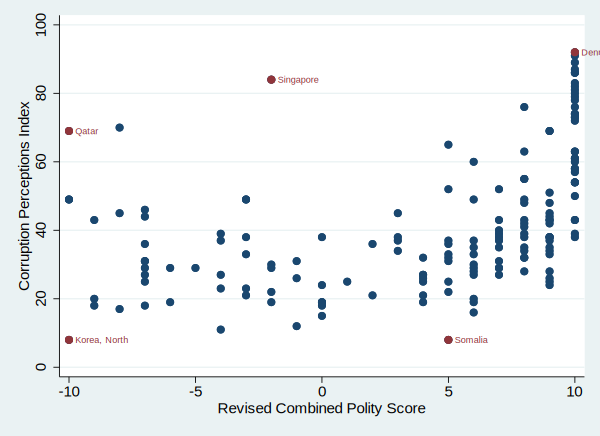


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [8]:
twoway  (scatter ti_cpi p_polity2) ///
        (scatter ti_cpi p_polity2 if select==1, mlabel(cname) mlabsize(vsmall)) ///
        , legend(off)

What we see here is thus two scatterplots, layered on top of each other. In the lower layer the dots are blue, without labels. The upper layer shows the same thing, but the only observations shown are those that match our condition that the variable select should have the value 1. For this layer, we also show labels.

To highlight a few observations makes the graph more readable, and we can in the text in the report discuss some especially interesting cases.

## Conclusions

Scatterplots are an often used and effective way to illustrate relationships, and convey a lot of information at once. But they are not always suitable. If we for instance work with survey daya, with only a few discrete values on the variables, the scatterplot will look very strange. In those cases, bar charts are probably preferable.

If you are writing a thesis or paper, experiment with the structure and look of the graph to make it is appealing and pedagogical as possible. The reader should not have to make an effort to understand what you are trying to say!